In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
from keras.preprocessing import image
from keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load the Xception model
# https://keras.io/applications/#xception
model = Xception(
    include_top=True,
    weights='imagenet')

In [5]:
# Default Image Size for Xception
image_size = (299, 299)

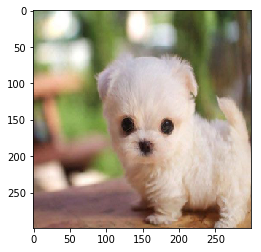

In [4]:
# Load the image and resize to the input dimensions that Xception
# was trained with
image_path = os.path.join("Images", "pup.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [5]:
# Preprocess image for model prediction
# This step handles scaling and normalization for Xception
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [('n02085936', 'Maltese_dog', 0.7673267), ('n02098286', 'West_Highland_white_terrier', 0.019897806), ('n02098413', 'Lhasa', 0.011911361)]


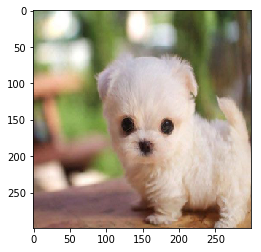

In [6]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [3]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use Xception to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=1)[0])
    return decode_predictions(predictions, top=1)[0]

Predicted: [('n02085936', 'Maltese_dog', 0.7673268)]


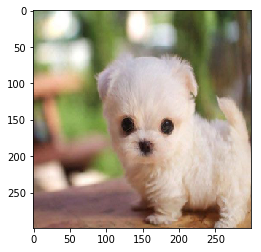

In [6]:
image_path = os.path.join("Images", "pup.jpg")
prediction = predict(image_path)
breed = prediction[0][1]

In [9]:
import pandas as pd
animal_outcome = pd.read_csv('../Animals.csv')
animal_outcome.head()

,Unnamed: 0,Animal ID,Animal Type,Birthday,Breed,Color,Fixed upon Intake,Fixed upon Outcome,Gender,Intake Age (days),Intake Condition,Intake DateTime,Intake Type,Name,Outcome Age,Outcome Date,Outcome Subtype,Outcome Type,Stay Duration
0,0,A748291,Dog,06/01/2016,Pit Bull Mix,Black,Intact,Spayed,Female,300,Normal,05/01/2017 02:26:00 PM,Stray,*Madison,365,09/04/2017 12:00:00 AM,Partner,Transfer,125 days 09:34:00.000000000
1,1,A750529,Dog,12/21/2016,Miniature Schnauzer Mix,White/Cream,Intact,Spayed,Female,150,Normal,05/28/2017 01:22:00 PM,Stray,NaN,150,06/01/2017 04:42:00 PM,Partner,Transfer,4 days 03:20:00.000000000
2,2,A730601,Cat,12/07/2015,Domestic Shorthair Mix,Blue Tabby,Intact,Neutered,Male,210,Normal,07/07/2016 12:11:00 PM,Stray,NaN,210,07/08/2016 09:00:00 AM,SCRP,Transfer,0 days 20:49:00.000000000
3,3,A748238,Dog,05/01/2014,Bichon Frise Mix,White,Intact,Neutered,Male,1095,Normal,05/01/2017 10:53:00 AM,Stray,NaN,1095,05/06/2017 03:57:00 PM,Partner,Transfer,5 days 05:04:00.000000000
4,4,A683644,Dog,06/13/2014,Border Collie Mix,Brown/White,Intact,Spayed,Female,28,Nursing,07/13/2014 11:02:00 AM,Owner Surrender,*Zoey,120,11/06/2014 10:06:00 AM,Foster,Adoption,115 days 23:04:00.000000000


In [10]:
print(breed)
animal_outcome.loc[animal_outcome['Breed'].str.lower().str.contains(breed, regex=True)]
# animal_outcome.loc[animal_outcome['Breed'].str.contains('border collie', regex=False)


Maltese_dog


,Unnamed: 0,Animal ID,Animal Type,Birthday,Breed,Color,Fixed upon Intake,Fixed upon Outcome,Gender,Intake Age (days),Intake Condition,Intake DateTime,Intake Type,Name,Outcome Age,Outcome Date,Outcome Subtype,Outcome Type,Stay Duration


In [11]:
from fuzzywuzzy import process
from fuzzywuzzy.fuzz import partial_ratio
test_process = process.extract(breed.replace('_', ' '), animal_outcome.Breed.to_dict(), scorer=partial_ratio, limit=100000000)


In [12]:
r = process.extractBests(breed.replace('_', ' '), animal_outcome.Breed.to_dict(), scorer=partial_ratio, score_cutoff=70, limit=1000000000)
animal_analysis = animal_outcome.loc[map(lambda x: x[-1], r)]

In [15]:
animal_analysis

,Unnamed: 0,Animal ID,Animal Type,Birthday,Breed,Color,Fixed upon Intake,Fixed upon Outcome,Gender,Intake Age (days),Intake Condition,Intake DateTime,Intake Type,Name,Outcome Age,Outcome Date,Outcome Subtype,Outcome Type,Stay Duration
1023,1023,A697431,Dog,02/24/2005,Maltese,White,Intact,Spayed,Female,3650,Normal,02/23/2015 05:38:00 PM,Stray,Lily,3650,03/09/2015 11:42:00 AM,NaN,Adoption,13 days 18:04:00.000000000
1024,1024,A697431,Dog,02/24/2005,Maltese,White,Intact,Spayed,Female,3650,Normal,02/23/2015 05:38:00 PM,Stray,Lily,4380,04/03/2017 06:18:00 PM,NaN,Return to Owner,770 days 00:40:00.000000000
3055,3055,A673072,Dog,02/19/2011,Maltese,White,Intact,Spayed,Female,1095,Normal,02/19/2014 01:51:00 PM,Public Assist,Masy,1095,03/07/2014 02:19:00 PM,NaN,Adoption,16 days 00:28:00.000000000
3922,3922,A769438,Dog,04/04/2012,Maltese,White,Intact,Spayed,Female,2190,Normal,04/04/2018 08:37:00 PM,Stray,NaN,2190,04/08/2018 04:44:00 PM,Partner,Transfer,3 days 20:07:00.000000000
7110,7110,A731111,Dog,07/16/2013,Maltese,Tricolor,Intact,Neutered,Male,1095,Normal,07/16/2016 12:46:00 PM,Stray,NaN,1095,07/20/2016 05:22:00 PM,NaN,Adoption,4 days 04:36:00.000000000
7819,7819,A673077,Dog,02/19/2009,Maltese,White,Intact,Spayed,Female,1825,Normal,02/19/2014 01:51:00 PM,Public Assist,*Charlotte,1825,05/21/2014 11:56:00 AM,Foster,Adoption,90 days 22:05:00.000000000
11036,11036,A673073,Dog,02/19/2007,Maltese,White,Intact,Spayed,Female,2555,Normal,02/19/2014 01:51:00 PM,Public Assist,*Tillie,2555,03/19/2014 09:41:00 AM,NaN,Adoption,27 days 19:50:00.000000000
12356,12356,A673093,Dog,01/28/2014,Maltese,White/Cream,Intact,Neutered,Male,21,Normal,02/19/2014 01:51:00 PM,Public Assist,NaN,90,05/04/2014 05:15:00 PM,Foster,Adoption,74 days 03:24:00.000000000
13473,13473,A768519,Dog,12/21/2006,Maltese,White,Spayed,Spayed,Female,4015,Normal,03/20/2018 06:27:00 PM,Stray,Luna,4015,03/22/2018 07:33:00 PM,NaN,Return to Owner,2 days 01:06:00.000000000
14760,14760,A673297,Dog,05/21/2013,Maltese,White,Intact,Neutered,Male,270,Normal,02/21/2014 04:22:00 PM,Stray,*Amos,365,05/31/2014 06:17:00 PM,Foster,Adoption,99 days 01:55:00.000000000
